In [1]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

In [2]:
# Load dataset (replace 'your_dataset.csv' with the actual dataset file)
df = pd.read_csv('electricity_new.csv')

## Exploratory Data Analysis (EDA)

### Class Distribution Before SMOTE


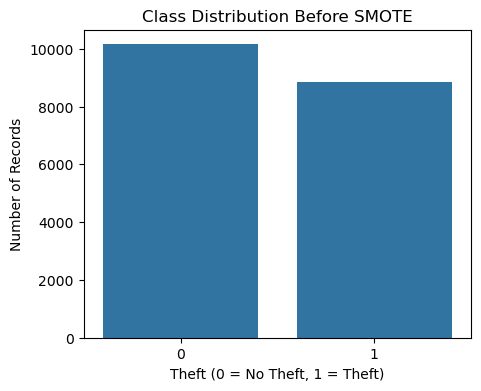

In [3]:

plt.figure(figsize=(5,4))
sns.countplot(x='Theft', data=df)
plt.title("Class Distribution Before SMOTE")
plt.xlabel("Theft (0 = No Theft, 1 = Theft)")
plt.ylabel("Number of Records")
plt.show()


### Feature Distributions


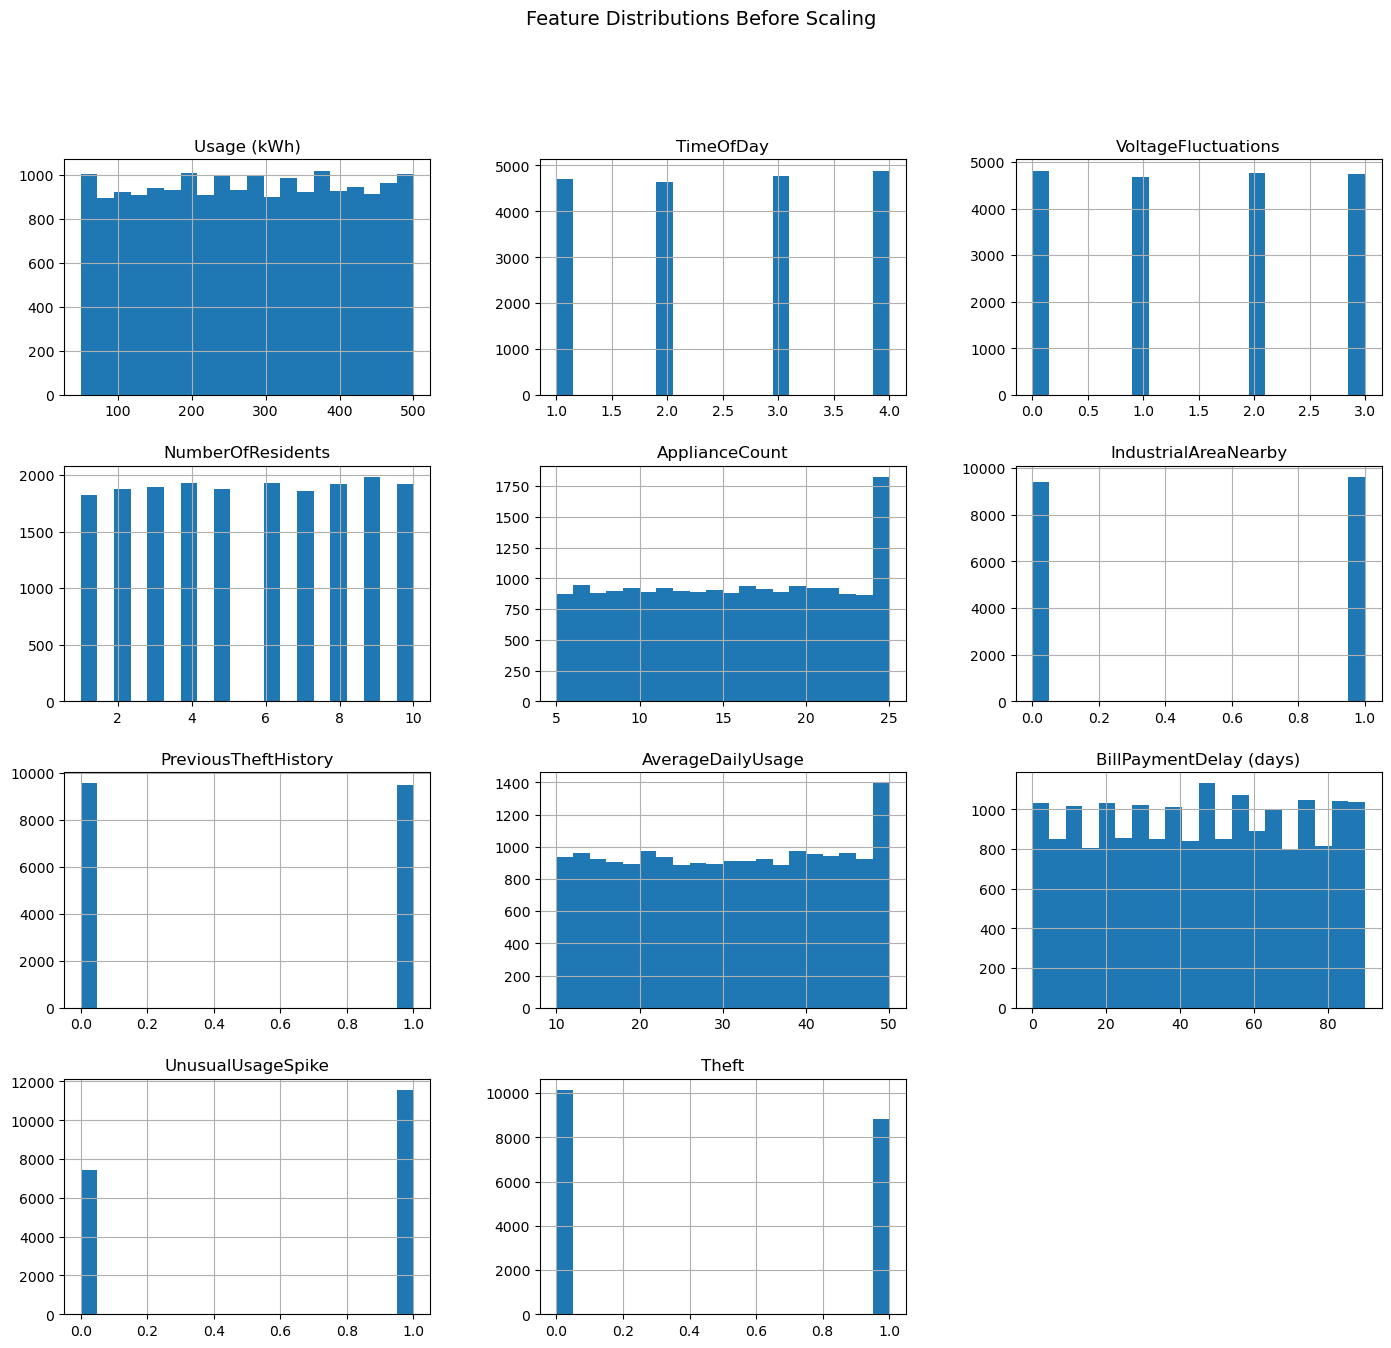

In [4]:
df.hist(figsize=(17,15), bins=20)
plt.suptitle("Feature Distributions Before Scaling", fontsize=14)
plt.show()


In [5]:
# Step 1: Handle missing values
df.fillna(df.median(), inplace=True)

In [6]:
# Step 2: Encode categorical variables
label_encoder = LabelEncoder()
if 'TimeOfDay' in df.columns:
    df['TimeOfDay'] = label_encoder.fit_transform(df['TimeOfDay'])


In [7]:
# Step 3: Separate features and target variable
X = df.drop('Theft', axis=1)
y = df['Theft']

## Handling Class Imbalance Using SMOTE


In [8]:
# Step 4: Address class imbalance (if any)
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

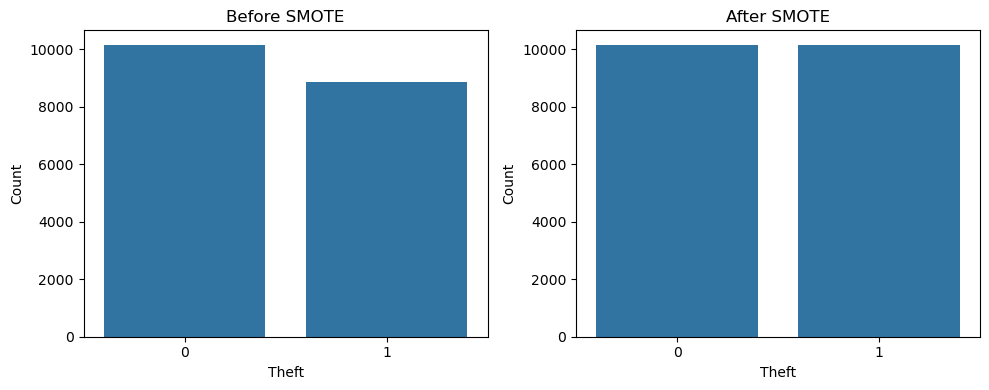

In [9]:
# Before SMOTE
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.countplot(x=y)
plt.title("Before SMOTE")
plt.xlabel("Theft")
plt.ylabel("Count")

# After SMOTE
plt.subplot(1,2,2)
sns.countplot(x=y_resampled)
plt.title("After SMOTE")
plt.xlabel("Theft")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


In [10]:
# Step 5: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [11]:
# Step 6: Create a pipeline with scaling and model training
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [12]:
# Step 7: Hyperparameter tuning using GridSearchCV
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='f1')

In [13]:
# Best model from GridSearchCV
best_pipeline = grid_search.best_estimator_

In [14]:
# Step 8: Save the pipeline as a pickle file
with open('theft_prediction_pipeline.pkl', 'wb') as pipeline_file:
    pickle.dump(best_pipeline, pipeline_file)

print("Pipeline saved as a pickle file.")

Pipeline saved as a pickle file.


In [17]:
from sklearn.metrics import accuracy_score
y_pred = best_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy",accuracy)

accuracy 0.9923664122137404


In [18]:
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 99.24%
